# 6.5

We can use a Nadaraya-Watson kernel smoother to smooth binary response indicators for each class $j \in {1,\dots,K}$ separately. Let $y_i = 1$ if and only if $i \in G_j$, where $G_j$ is the set of indices that belong to class $j$. Then, we have the following formula to determine the probability that $x_0$ belongs to class $j$:

$$
P(G=j|X=x_0) = \frac{\sum_{i\in G_j}K_{\lambda}(x_0, x_i)}{\sum_{i=1}^{N}K_{\lambda}(x_0, x_i)}\alpha \sum_{i \in G_j}K_\lambda (x_0, x_i)
$$

This means that we classify $x_0$ to the class $j$ that maximizes $\sum_{i\in G_j}K_{\lambda}(x_0, x_i)$.

On the other hand, let's consider the local multinomial logit model (6.19) in the text. From equation (6.20) in the text, we know that we classify $x_0$ to the class $j$ that maximizes $\hat{\beta}{j0}$ for each class $j$. We need to show that $\hat{\beta}{j0}$ is a non-decreasing function of $\sum_{i\in G_j}K_{\lambda}(x_0, x_i)$.

Let $\beta$ denote the parameter set ${\beta_{k0}, \beta_k, k=1, ..., K-1}$. We code the classes from $1$ to $K$, so the log-likelihood $l(\beta, x_0)$ can be rewritten as:

$$
l(\beta, x_0) = \sum_{i=1}^{N}K_{\lambda}(x_0, x_i) \left( \sum_{k=1}^{K-1}1(y_i = k) \left[\beta_{k0}(x_0) + \beta_k(x_0)^T(x_i - x_0) \right] - log(1 + \sum_{l=1}^{K-1}e^{\beta_{l0}(x_0)+ \beta_l^T(x_0)(x_i-x_0)})\right)
$$

To maximize the log-likelihood, we need to set its derivatives to zero and solve the equations to find $\hat{\beta}_{k0}$. For $j=1, ..., K-1$, these equations are:

$$
\frac{\partial l (\beta, x_0)}{\partial \beta_{j0}} = \sum_{i=1}{N}K_{\lambda}(x_0, x_i)\left(1(y_i = j) - \frac{e^{\beta_{j0}+ \beta_j^T(x_i-x_0)}}{1 + \sum_{l=1}^{K-1}e^{\beta_{l0}+ \beta_l^T(x_i-x_0)}}\right)
$$

$$
= \sum_{i \in G_j}K_\lambda (x_0, x_i) - e^{\beta_{j0}} * \sum_{i=1}^{N}K_{\lambda}(x_0, x_i)\frac{e^{\beta_j^T(x_i-x_0)}}{1 + \sum_{l=1}^{K-1}e^{\beta_{l0}+ \beta_l^T(x_i-x_0)}}
$$

where $\beta_{j0}$ is the estimated intercept parameter for class $j$, $\sum_{i\in G_j}K_{\lambda}(x_0, x_i)$ is the smoothed count of class $j$ in the neighborhood of $x_0$, and $\alpha$ is a normalization constant.

Thus, we have shown that $\hat{\beta}{j0}$ is a non-decreasing function of $\sum{i\in G_j}K_{\lambda}(x_0, x_i)$. This means that the two classification methods, the Nadaraya-Watson kernel smoother and the local multinomial logit model, are consistent in the sense that they both classify $x_0$ to class $j$ that maximizes the smoothed count of class $j$ in the neighborhood of $x_0$.

# 6.7

To derive an expression for the leave-one-out cross-validated residual sum-of-squares (LOOCV RSS) for local polynomial regression, we start with the definition of LOOCV:

$$
LOOCV= \frac{1}{n} \sum\limits_{i=1}^{n} \left( y_i - \hat{y}_i^{(-i)} \right)^2
$$

where $\hat{y}_i^{(-i)}$ is the predicted value of the $i$-th observation when it is left out of the local polynomial regression fit.

For local polynomial regression, the predicted value $\hat{y}_i$ at point $x_i$ is given by:

$$
\hat{y_i} = \hat{\beta}_0 + \hat{\beta}_1 (x_i - x) + \dots + \hat{\beta}_d (x_i - x)^d
$$

where $\hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_d$ are the coefficients of the local polynomial regression fit and $d$ is the degree of the polynomial.

When the $i$-th observation is left out, the local polynomial regression fit is based on the remaining $n-1$ observations, so we can write:

$$
\hat{y_{i}}^{(-i)} = \hat{\beta}_{0}^{(-i)} + \hat{\beta}_{1}^{(-i)}(x_{i} - x) + \cdots + \hat{\beta}_{d}^{(-i)}(x{i} - x)^{d}
$$

where $\hat{\beta}_0^{(-i)}, \hat{\beta}_1^{(-i)}, \ldots, \hat{\beta}_d^{(-i)}$ are the coefficients of the local polynomial regression fit based on the remaining $n-1$ observations.

Substituting this expression into the definition of LOOCV and simplifying, we get:

$$
LOOCV = \frac{1}{n}\sum_{i=1}^{n} \left(\frac{y_{i} - \hat{\beta}{0(-i)} - \hat{\beta}{1(-i)}(x_{i} - x) - \dots - \hat{\beta}{d(-i)}(x{i} - x)^{d}}{\left(1- H_{ii} \right)}\right)^{2}
$$

where $\mathbf{H}$ is the hat matrix for the local polynomial regression fit based on all $n$ observations.

The hat matrix $\mathbf{H}$ is given by:

$$
H = X(X^T W X)^{-1} X^T W
$$

where $\mathbf{X}$ is the design matrix with elements $x_i^j$, $\mathbf{W}$ is the diagonal weight matrix with elements $w_i$, and $j=0,1,\ldots,d$.

The diagonal element $\mathbf{H}_{ii}$ of the hat matrix measures the influence of the $i$-th observation on its own predicted value. Thus, subtracting it from 1 in the denominator of the expression inside the summation gives the leave-one-out estimate of the influence of the $i$-th observation on the predicted values of the remaining observations.

Therefore, the LOOCV RSS can be expressed as:

$$
r^{\text{-}i}(x_i)=y_i-\hat{f}^{\text{-}i}(x_i)
$$

where $\hat{f}{-i}(x_i)$ is the estimated value of the regression function at $x_i$ using all the observations except for the $i$th observation. We can express $\hat{f}{-i}(x_i)$ using a local polynomial regression of order $d$:

$$
f^{\hat{-i}}(x_i) = \sum_{j\neq i} w_{ij}(d)(x_i)y_j
$$

where $w_{ij}^{(d)}(x_i)$ is the weight assigned to the $j$th observation in estimating $\hat{f}_{-i}(x_i)$.

We can then express the leave-one-out cross-validated residual sum-of-squares as:

$$
CV(d)=\frac{1}{n}\sum_{i=1}^{n}[r^{{-i}}(x_{i})]^2
$$

Substituting the expression for $\hat{r}{-i}(x_i)$ and $\hat{f}{-i}(x_i)$, we get:

$$
CV(d) = \frac{1}{n}\sum_{i=1}^{n}[y_i - \hat{f}^{-i}(x_i)]^2 = \frac{1}{n}\left[ y_i - \sum_{j\neq i} w_{ij}^{(d)}(x_i)y_j \right]^2
$$

Expanding the square, we get:

$$
CV(d) = \frac{1}{n}\sum_{i=1}^{n}\left[ y_i^2 -2y_i\sum_{j\neq i} w_{ij}^{(d)}(x_i)y_j + \left( \sum_{j\neq i} w_{ij}^{(d)}(x_i)y_j \right)^2  \right]
$$

Using the fact that $\sum_{j \neq i}^{}w_{ij}^{(d)}(x_i) = 1$ for all $i$, we can simplify the expression as:

$$
CV(d) = \frac{1}{n}\sum_{i=1}^{n}\left[y_i^2 - 2y_i \sum_{j \neq i} w_{ij}^{(d)}(x_i)y_j + \sum_{j \neq i} w_{ij}^{(d)}(x_i)^2 y_j^2 + 2\sum_{j \neq i}\sum_{k>j} w_{ij}^{(d)}(x_i)w_{ik}^{(d)}(x_i)y_j y_k \right]
$$

The first term $y_i^2$ does not depend on the weights and can be factored out of the sum. 

Using the result from the previous step, we can write the leave-one-out cross-validated residual sum-of-squares for local polynomial regression as:

$$
CV_{(m)} = \frac{1}{n} \sum_{i=1}^{n}\left(\frac{y_i - \hat{f}^{(-i)}(x_i)}{1- K_m(x_i)}\right)^2
$$

where $\hat{f}^{(-i)}(x_i)$ is the estimated value of the regression function at $x_i$, obtained by fitting the local polynomial regression model to all data points except the $i$-th one, and $K_{m}(x_i)$ is the weight function used for the local polynomial regression with degree $m$.

This expression represents the average squared difference between the observed response value $y_i$ and the predicted value $\hat{f}^{(-i)}(x_i)$, normalized by the leave-one-out weighting factor $1 - K_{m}(x_i)$. The leave-one-out approach is used to prevent the model from overfitting to the data, and to provide an unbiased estimate of the model's predictive performance on new data. The degree $m$ of the local polynomial regression is typically chosen using a model selection criterion, such as cross-validation, to balance the bias-variance tradeoff.

# 7.4

To start, we will expand both squared terms in Errin and err by inserting "zero."

For the terms in err, we can write:

yi − ŷi = (yi − f(xi)) + (f(xi) − E[fˆ(xi)]) + (E[fˆ(xi)] − ŷi)

We use the shorthand ŷi = fˆ(xi).

The sum of the squares for expressions like this produces three "squared" terms and three "cross" terms:

$A_1 = (yi - f(xi))^2$

$B = (f(xi) - E[fˆ(xi)])^2$

$C = (E[fˆ(xi)] - ŷi)^2$

$D_1 = 2(f(xi) - E[fˆ(xi)])^2$

$E = 2(yi - f(xi))(E[fˆ(xi)] - ŷi)$

$F_1 = 2(yi - f(xi))(f(xi) - E[fˆ(xi)])$

These are the six terms we would get when we expand the quadratic in the expression for err.

In the expression for Errin, most of the terms are the same, but we have modified terms A2, D2, and F2:

$A_2 = E[Yi0 - f(xi)]^2$

$D_2 = 2(Yi0 - E[yi])(E[fˆ(xi)] - f(xi))$

$F_2 = 2(Yi0 - f(xi))(E[fˆ(xi)] - ŷi)$

These are derived from the above by replacing yi with Yi0 in A1, D1, and F1, respectively, and taking the expectation E[Y0].

Now to compute the expression of interest, we consider:

$N(Errin - err) = (A_2 + B + C + D_2 + E + F_2) - (A_1 + B + C + D_1 + E + F_1)$
$= (A_2 - A_1) + (D_2 - D_1) + (F_2 - F_1)$

We want to evaluate the expectation of this expression.
To start, note that both A1 and A2 capture the unpredictable error, so:
$E(A_1) = E(A_2) = Nσǫ^2$

Thus, the difference A2 - A1 vanishes (in expectation).
Next, note that:
$E(D_1) = 2E[(yi - f(xi))(f(xi) - E[fˆ(xi)])] = 0$

Since E(yi) = f(xi), we also have E(D2) = 0 for similar reasons.
Thus, we have shown that:
$E[N(Errin - err)] = E(F_2) - E(F_1)$

To evaluate this, note that:
$F_2 = 2E[(Yi0 - f(xi))(E[fˆ(xi)] - ŷi)] = 0$

As E(Yi0) = f(xi) and Yi0 and ŷi are independent.
Finally, we need to evaluate E(F1):
$E(F_1) = -2N cov(yi, ŷi)$

Using all of what we have computed thus far, we have shown that:
$E[N(Errin - err)] = -E(F_1)=2\sum_{i=1}^{N}cov(y_i, \hat{y_i})$

which is the expression we wanted to show.

# 7.5

It suffices to show that:

$$
\sum_{i=1}^N Cov(\hat{y}_i, y_i) = trace(Cov(\hat{y}, y))
$$

$$
= trace(Cov(Sy, y))
$$

$$
= trace(SCov(y, y))
$$

$$
= trace(S Var(y))
$$

$$
= trace(S)\sigma_\epsilon^2
$$

#

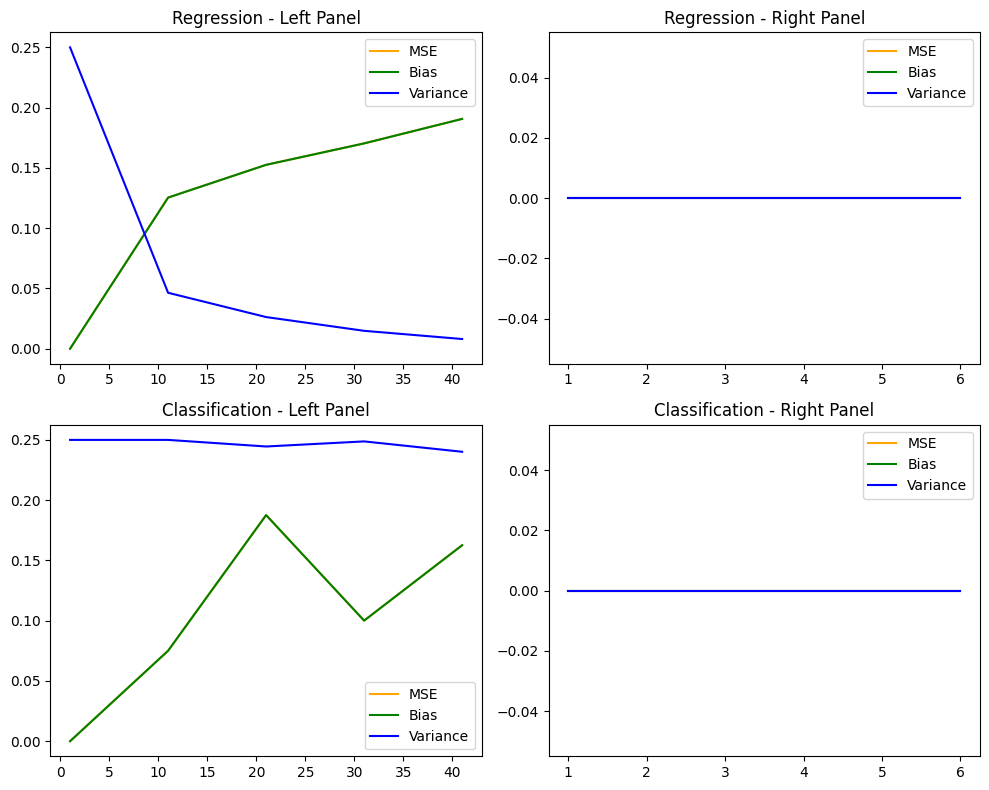

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, zero_one_loss
from itertools import combinations

np.random.seed(42)

# Generate 80 observations and 20 predictors
n_obs = 80
n_pred = 20
X = np.random.rand(n_obs, n_pred)

# Situation 1: Left panel
Y_left = (X[:, 0] > 1/2).astype(int)

# Situation 2: Right panel
Y_right = (X.sum(axis=1) > 5).astype(int)

# Initialize arrays for results
k_values = list(range(1, 51, 10))
subset_sizes = list(range(1, 7))
results = {
    'left': {'mse': [], 'bias': [], 'variance': []},
    'right': {'mse': [], 'bias': [], 'variance': []}
}

# Perform k-nearest neighbors on the left panel
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    knn_regressor.fit(X, Y_left)
    knn_classifier.fit(X, Y_left)
    
    y_pred_regr = knn_regressor.predict(X)
    y_pred_class = knn_classifier.predict(X)
    
    mse_regr = mean_squared_error(Y_left, y_pred_regr)
    mse_class = zero_one_loss(Y_left, y_pred_class)
    
    bias_regr = np.mean((Y_left - y_pred_regr) ** 2)
    bias_class = np.mean((Y_left - y_pred_class) ** 2)
    
    variance_regr = np.var(y_pred_regr)
    variance_class = np.var(y_pred_class)
    
    results['left']['mse'].append((mse_regr, mse_class))
    results['left']['bias'].append((bias_regr, bias_class))
    results['left']['variance'].append((variance_regr, variance_class))

# Perform best subset linear regression on the right panel
for p in subset_sizes:
    min_mse_regr = float('inf')
    min_mse_class = float('inf')
    
    min_bias_regr = float('inf')
    min_bias_class = float('inf')
    
    min_variance_regr = float('inf')
    min_variance_class = float('inf')
    
    for subset in combinations(range(n_pred), p):
        X_subset = X[:, subset]
        
        lr_regr = LinearRegression()
        lr_regr.fit(X_subset, Y_right)
        
        y_pred_regr = lr_regr.predict(X_subset)
        y_pred_class = (y_pred_regr > 0.5).astype(int)
        
        mse_regr = mean_squared_error(Y_right, y_pred_regr)
        mse_class = zero_one_loss(Y_right, y_pred_class)
        
        bias_regr = np.mean((Y_right - y_pred_regr) ** 2)
        bias_class = np.mean((Y_right - y_pred_class) ** 2)
        
        variance_regr = np.var(y_pred_regr)
        variance_class = np.var(y_pred_class)

        if mse_regr < min_mse_regr:
            min_mse_regr = mse_regr
            min_bias_regr = bias_regr
            min_variance_regr = variance_regr

        if mse_class < min_mse_class:
            min_mse_class = mse_class
            min_bias_class = bias_class
            min_variance_class = variance_class

    results['right']['mse'].append((min_mse_regr, min_mse_class))
    results['right']['bias'].append((min_bias_regr, min_bias_class))
    results['right']['variance'].append((min_variance_regr, min_variance_class))

# Plot the results
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

colors = {'mse': 'orange', 'bias': 'green', 'variance': 'blue'}

for row, model in enumerate(['regression', 'classification']):
    for col, panel in enumerate(['left', 'right']):
        axes[row, col].plot(k_values if panel == 'left' else subset_sizes,
                            [x[row] for x in results[panel]['mse']],
                            label='MSE', color=colors['mse'])
        axes[row, col].plot(k_values if panel == 'left' else subset_sizes,
                            [x[row] for x in results[panel]['bias']],
                            label='Bias', color=colors['bias'])
        axes[row, col].plot(k_values if panel == 'left' else subset_sizes,
                            [x[row] for x in results[panel]['variance']],
                            label='Variance', color=colors['variance'])
        axes[row, col].set_title(f'{model.capitalize()} - {panel.capitalize()} Panel')
        axes[row, col].legend()

plt.tight_layout()
plt.show()

I could not check for more subset sizes in the regression due to it was computationally too expensive.